In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns


In [2]:
iris = datasets.load_iris()
#Transformando a un dataframe de pandas
datos = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
type(datos)
datos
#Cambiandole los nombres a las columnas
datos.columns=["Sepal.length","Sepal.width","Petal.length","Petal.width","Specie"]
datos

,Sepal.length,Sepal.width,Petal.length,Petal.width,Specie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Forma Gráfica

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

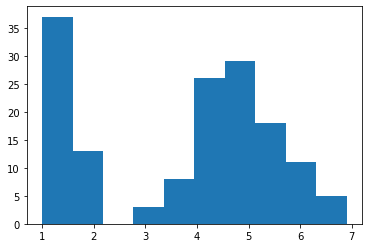

In [3]:
plt.hist(datos[["Petal.length"]].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x2487acd71f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2487acd7850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2487acd6f20>],
 'medians': [<matplotlib.lines.Line2D at 0x2487acd7d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2487ad10040>],
 'means': []}

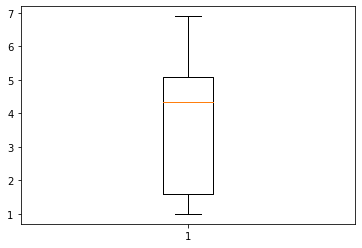

In [4]:
plt.boxplot(datos[["Petal.length"]].values)

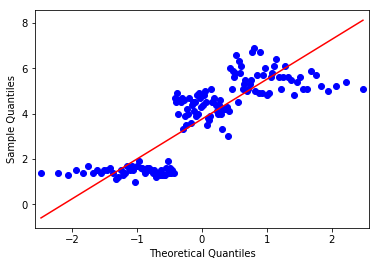

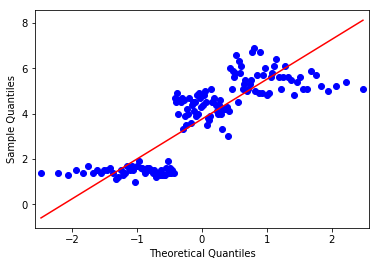

In [6]:
qqplot(datos[["Petal.length"]].values, line='s')

# Pruebas Estadísticas

## Shapiro-Wilks

In [7]:
W,p=stats.shapiro(datos[['Petal.length']])

In [8]:
print("p = %.11f"%p)

p = 0.00000000074


## Anderson-Darling

In [5]:
result = stats.anderson(datos[['Petal.length']].values.flatten())
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.895, data does not look normal (reject H0)
1.000: 1.065, data does not look normal (reject H0)


## Kolmogorov - Smirnov

In [7]:
ks_statistic, p_value = stats.kstest(datos[['Petal.length']], 'norm')
print ("p = %.20f"%p_value)


p = 0.00000000000000000000


## Lilliefors

In [8]:
ks,p_value = diag.lilliefors(datos[['Petal.length']].values.flatten())
print("p=%.20f" % p_value)


p=0.00099999999999988987


Se rechaza la hipótesis nula, los datos no siguen una distribución normal
